## imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

writer = pd.ExcelWriter("./results/behavioral_data.xlsx", engine="xlsxwriter")

## config

In [2]:
config_prefix = ["iterative", "recursive", "higher-order", "list-comprehension"]

config_datasheet = r"./results/preprocessed.xlsx"

## import df

In [3]:
raw = pd.read_excel(config_datasheet)
df = pd.DataFrame(raw)
df["ResponseTime"] = df.apply(lambda x: x["ResponseTime"] / 1000.0, axis=1)

df_iterative = df.loc[df["ProgrammingStyle"] == "iterative"].drop(["TimeData"], axis=1)
df_recursive = df.loc[df["ProgrammingStyle"] == "recursive"].drop(["TimeData"], axis=1)
df_list_comprehension = df.loc[df["ProgrammingStyle"] == "list-comprehension"].drop(["TimeData"], axis=1)
df_higher_order = df.loc[df["ProgrammingStyle"] == "higher-order"].drop(["TimeData"], axis=1)

df_array_independent = [df_iterative, df_recursive, df_list_comprehension, df_higher_order]

get names of algorithm

In [4]:
algo_name_array = [name for name in df["Algorithm"].unique()]

create result

In [6]:
cols = [
    "Algorithm",

    "iterative correct",
    "iterative total Answers",
    "iterative percent",
    "recursive correct",
    "recursive total Answers",
    "recursive percent",
    "list-comprehension correct",
    "list-comprehension total Answers",
    "list-comprehension percent",
    "higher-order-function correct",
    "higher-order-function total Answers",
    "higher-order-function percent",

    "iterative response time mean",
    "iterative response time deviation",
    "recursive response time mean",
    "recursive response time deviation",
    "list-comprehension response time mean",
    "list-comprehension response time deviation",
    "higher-order-function response time mean",
    "higher-order-function response time deviation",

    "iterative fixation count mean",
    "iterative fixation count deviation",
    "recursive fixation count mean",
    "recursive fixation count deviation",
    "list-comprehension fixation count mean",
    "list-comprehension fixation count deviation",
    "higher-order-function fixation count mean",
    "higher-order-function fixation count deviation",

    "iterative saccades upwards mean",
    "iterative saccades upwards deviation",
    "recursive saccades upwards mean",
    "recursive saccades upwards deviation",
    "list-comprehension saccades upwards mean",
    "list-comprehension saccades upwards deviation",
    "higher-order-function saccades upwards mean",
    "higher-order-function saccades upwards deviation",
]

result_df = pd.DataFrame(columns=cols)

def get_saccades_upwards_per_snippet(click_data):
    saccades_upwards = []
    for data in click_data:
        try:
            data = str(data).split(" ")
            data = [int(current.split("-")[-1]) for current in data]
            saccades_upwards.append(data)
        except:
            continue

    saccades_upwards_tmp = []
    for current in saccades_upwards:
        count = 0
        for i in range(len(current)-1):
            if current[i] < current[i+1]:
                count += 1
        saccades_upwards_tmp.append(count)
    return saccades_upwards_tmp

# get values for every algorithm
for algo_name in algo_name_array:
    algorithm = algo_name

    iterative_correct = df_iterative.loc[(df_iterative["Algorithm"] == algo_name) & (df_iterative["Correctness"]==True)]["Correctness"].sum()
    iterative_total_answers = df_iterative.loc[(df_iterative["Algorithm"] == algo_name)]["Correctness"].count()
    iterative_percent = iterative_correct / iterative_total_answers

    recursive_correct = df_recursive.loc[(df_recursive["Algorithm"] == algo_name) & (df_recursive["Correctness"]==True)]["Correctness"].sum()
    recursive_total_answers = df_recursive.loc[(df_recursive["Algorithm"] == algo_name)]["Correctness"].count()
    recursive_percent = recursive_correct / recursive_total_answers

    list_comprehension_correct = df_list_comprehension.loc[(df_list_comprehension["Algorithm"] == algo_name) & (df_list_comprehension["Correctness"]==True)]["Correctness"].sum()
    list_comprehension_total_answers = df_list_comprehension.loc[(df_list_comprehension["Algorithm"] == algo_name)]["Correctness"].count()
    list_comprehension_percent = list_comprehension_correct / list_comprehension_total_answers

    higher_order_function_correct = df_higher_order.loc[(df_higher_order["Algorithm"] == algo_name) & (df_higher_order["Correctness"]==True)]["Correctness"].sum()
    higher_order_function_total_answers = df_higher_order.loc[(df_higher_order["Algorithm"] == algo_name)]["Correctness"].count()
    higher_order_function_percent = higher_order_function_correct / higher_order_function_total_answers

    iterative_response_time_mean = df_iterative.loc[(df_iterative["Algorithm"] == algo_name)]["ResponseTime"].mean()
    iterative_response_time_deviation = df_iterative.loc[(df_iterative["Algorithm"] == algo_name)]["ResponseTime"].std()

    recursive_response_time_mean = df_recursive.loc[(df_recursive["Algorithm"] == algo_name)]["ResponseTime"].mean()
    recursive_response_time_deviation = df_recursive.loc[(df_recursive["Algorithm"] == algo_name)]["ResponseTime"].std()

    list_comprehension_response_time_mean = df_list_comprehension.loc[(df_list_comprehension["Algorithm"] == algo_name)]["ResponseTime"].mean()
    list_comprehension_response_time_deviation = df_list_comprehension.loc[(df_list_comprehension["Algorithm"] == algo_name)]["ResponseTime"].std()

    higher_order_function_response_time_mean = df_higher_order.loc[(df_higher_order["Algorithm"] == algo_name)]["ResponseTime"].mean()
    higher_order_function_response_time_deviation = df_higher_order.loc[(df_higher_order["Algorithm"] == algo_name)]["ResponseTime"].std()

    iterative_fixation_count = df_iterative.loc[(df_iterative["Algorithm"] == algo_name)]["ClickData"].apply(lambda x: len(str(x).split(" ")))
    iterative_fixation_count_mean = iterative_fixation_count.mean()
    iterative_fixation_count_deviation = iterative_fixation_count.std()

    recursive_fixation_count = df_recursive.loc[(df_recursive["Algorithm"] == algo_name)]["ClickData"].apply(lambda x: len(str(x).split(" ")))
    recursive_fixation_count_mean = recursive_fixation_count.mean()
    recursive_fixation_count_deviation = recursive_fixation_count.std()

    list_comprehension_fixation_count = df_list_comprehension.loc[(df_list_comprehension["Algorithm"] == algo_name)]["ClickData"].apply(lambda x: len(str(x).split(" ")))
    list_comprehension_fixation_count_mean = list_comprehension_fixation_count.mean()
    list_comprehension_fixation_count_deviation = list_comprehension_fixation_count.std()

    higher_order_function_fixation_count = df_higher_order.loc[(df_higher_order["Algorithm"] == algo_name)]["ClickData"].apply(lambda x: len(str(x).split(" ")))
    higher_order_function_fixation_count_mean = higher_order_function_fixation_count.mean()
    higher_order_function_fixation_count_deviation = higher_order_function_fixation_count.std()

    iterative_saccades_upwards = get_saccades_upwards_per_snippet(df_iterative.loc[(df_iterative["Algorithm"] == algo_name)]["ClickData"])
    iterative_saccades_upwards_mean = np.mean(iterative_saccades_upwards)
    iterative_saccades_upwards_deviation = np.std(iterative_saccades_upwards)

    recursive_saccades_upwards = get_saccades_upwards_per_snippet(df_recursive.loc[(df_recursive["Algorithm"] == algo_name)]["ClickData"])
    recursive_saccades_upwards_mean = np.mean(recursive_saccades_upwards)
    recursive_saccades_upwards_deviation = np.std(recursive_saccades_upwards)

    list_comprehension_saccades_upwards = get_saccades_upwards_per_snippet(df_list_comprehension.loc[(df_list_comprehension["Algorithm"] == algo_name)]["ClickData"])
    list_comprehension_saccades_upwards_mean = np.mean(list_comprehension_saccades_upwards)
    list_comprehension_saccades_upwards_deviation = np.std(list_comprehension_saccades_upwards)

    higher_order_function_saccades_upwards = get_saccades_upwards_per_snippet(df_higher_order.loc[(df_higher_order["Algorithm"] == algo_name)]["ClickData"])
    higher_order_function_saccades_upwards_mean = np.mean(higher_order_function_saccades_upwards)
    higher_order_function_saccades_upwards_deviation = np.std(higher_order_function_saccades_upwards)

    result_df = result_df.append(pd.DataFrame([[algorithm,

                                                iterative_correct, iterative_total_answers, iterative_percent,
                                                recursive_correct, recursive_total_answers, recursive_percent,
                                                list_comprehension_correct, list_comprehension_total_answers, list_comprehension_percent,
                                                higher_order_function_correct, higher_order_function_total_answers, higher_order_function_percent,

                                                iterative_response_time_mean, iterative_response_time_deviation,
                                                recursive_response_time_mean, recursive_response_time_deviation,
                                                list_comprehension_response_time_mean, list_comprehension_response_time_deviation,
                                                higher_order_function_response_time_mean, higher_order_function_response_time_deviation,

                                                iterative_fixation_count_mean, iterative_fixation_count_deviation,
                                                recursive_fixation_count_mean, recursive_fixation_count_deviation,
                                                list_comprehension_fixation_count_mean, list_comprehension_fixation_count_deviation,
                                                higher_order_function_fixation_count_mean, higher_order_function_fixation_count_deviation,

                                                iterative_saccades_upwards_mean, iterative_saccades_upwards_deviation,
                                                recursive_saccades_upwards_mean, recursive_saccades_upwards_deviation,
                                                list_comprehension_saccades_upwards_mean, list_comprehension_saccades_upwards_deviation,
                                                higher_order_function_saccades_upwards_mean, higher_order_function_saccades_upwards_deviation
                                                ]], columns=result_df.columns), ignore_index=True)

#get values for total experiment
algorithm = "total"

iterative_correct = df_iterative.loc[(df_iterative["Correctness"]==True)]["Correctness"].sum()
iterative_total_answers = df_iterative["Correctness"].count()
iterative_percent = iterative_correct / iterative_total_answers

recursive_correct = df_recursive.loc[(df_recursive["Correctness"]==True)]["Correctness"].sum()
recursive_total_answers = df_recursive["Correctness"].count()
recursive_percent = recursive_correct / recursive_total_answers

list_comprehension_correct = df_list_comprehension.loc[(df_list_comprehension["Correctness"]==True)]["Correctness"].sum()
list_comprehension_total_answers = df_list_comprehension["Correctness"].count()
list_comprehension_percent = list_comprehension_correct / list_comprehension_total_answers

higher_order_function_correct = df_higher_order.loc[(df_higher_order["Correctness"]==True)]["Correctness"].sum()
higher_order_function_total_answers = df_higher_order["Correctness"].count()
higher_order_function_percent = higher_order_function_correct / higher_order_function_total_answers

iterative_response_time_mean = df_iterative["ResponseTime"].mean()
iterative_response_time_deviation = df_iterative["ResponseTime"].std()

recursive_response_time_mean = df_recursive["ResponseTime"].mean()
recursive_response_time_deviation = df_recursive["ResponseTime"].std()

list_comprehension_response_time_mean = df_list_comprehension["ResponseTime"].mean()
list_comprehension_response_time_deviation = df_list_comprehension["ResponseTime"].std()

higher_order_function_response_time_mean = df_higher_order["ResponseTime"].mean()
higher_order_function_response_time_deviation = df_higher_order["ResponseTime"].std()

iterative_fixation_count = df_iterative["ClickData"].apply(lambda x: len(str(x).split(" ")))
iterative_fixation_count_mean = iterative_fixation_count.mean()
iterative_fixation_count_deviation = iterative_fixation_count.std()

recursive_fixation_count = df_recursive["ClickData"].apply(lambda x: len(str(x).split(" ")))
recursive_fixation_count_mean = recursive_fixation_count.mean()
recursive_fixation_count_deviation = recursive_fixation_count.std()

list_comprehension_fixation_count = df_list_comprehension["ClickData"].apply(lambda x: len(str(x).split(" ")))
list_comprehension_fixation_count_mean = list_comprehension_fixation_count.mean()
list_comprehension_fixation_count_deviation = list_comprehension_fixation_count.std()

higher_order_function_fixation_count = df_higher_order["ClickData"].apply(lambda x: len(str(x).split(" ")))
higher_order_function_fixation_count_mean = higher_order_function_fixation_count.mean()
higher_order_function_fixation_count_deviation = higher_order_function_fixation_count.std()

iterative_saccades_upwards = get_saccades_upwards_per_snippet(df_iterative["ClickData"])
iterative_saccades_upwards_mean = np.mean(iterative_saccades_upwards)
iterative_saccades_upwards_deviation = np.std(iterative_saccades_upwards)

recursive_saccades_upwards = get_saccades_upwards_per_snippet(df_recursive["ClickData"])
recursive_saccades_upwards_mean = np.mean(recursive_saccades_upwards)
recursive_saccades_upwards_deviation = np.std(recursive_saccades_upwards)

list_comprehension_saccades_upwards = get_saccades_upwards_per_snippet(df_list_comprehension["ClickData"])
list_comprehension_saccades_upwards_mean = np.mean(list_comprehension_saccades_upwards)
list_comprehension_saccades_upwards_deviation = np.std(list_comprehension_saccades_upwards)

higher_order_function_saccades_upwards = get_saccades_upwards_per_snippet(df_higher_order["ClickData"])
higher_order_function_saccades_upwards_mean = np.mean(higher_order_function_saccades_upwards)
higher_order_function_saccades_upwards_deviation = np.std(higher_order_function_saccades_upwards)

result_df = result_df.append(pd.DataFrame([[algorithm,

                                            iterative_correct, iterative_total_answers, iterative_percent,
                                            recursive_correct, recursive_total_answers, recursive_percent,
                                            list_comprehension_correct, list_comprehension_total_answers, list_comprehension_percent,
                                            higher_order_function_correct, higher_order_function_total_answers, higher_order_function_percent,

                                            iterative_response_time_mean, iterative_response_time_deviation,
                                            recursive_response_time_mean, recursive_response_time_deviation,
                                            list_comprehension_response_time_mean, list_comprehension_response_time_deviation,
                                            higher_order_function_response_time_mean, higher_order_function_response_time_deviation,

                                            iterative_fixation_count_mean, iterative_fixation_count_deviation,
                                            recursive_fixation_count_mean, recursive_fixation_count_deviation,
                                            list_comprehension_fixation_count_mean, list_comprehension_fixation_count_deviation,
                                            higher_order_function_fixation_count_mean, higher_order_function_fixation_count_deviation,

                                            iterative_saccades_upwards_mean, iterative_saccades_upwards_deviation,
                                            recursive_saccades_upwards_mean, recursive_saccades_upwards_deviation,
                                            list_comprehension_saccades_upwards_mean, list_comprehension_saccades_upwards_deviation,
                                            higher_order_function_saccades_upwards_mean, higher_order_function_saccades_upwards_deviation
                                            ]], columns=result_df.columns), ignore_index=True)

In [7]:
result_df.to_excel(writer, "Behavioral", index=False)

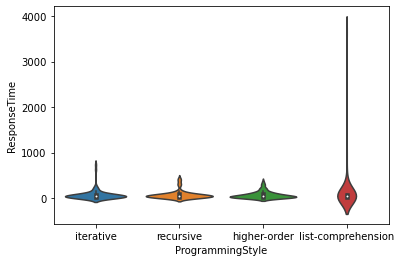

In [13]:
ax = sns.violinplot(x="ProgrammingStyle", y="ResponseTime", data=df)
plt.savefig("results/behavioral/violin_response_time.pdf", bbox_inches="tight", pad_inches=0.01)

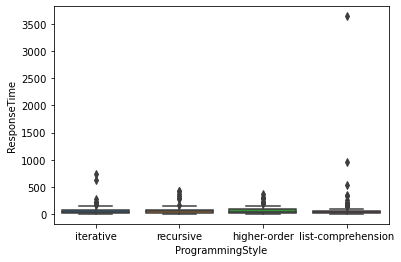

In [14]:
ax = sns.boxplot(x="ProgrammingStyle", y="ResponseTime", data=df)
plt.savefig("results/behavioral/boxplot_response_time.pdf", bbox_inches="tight", pad_inches=0.01)

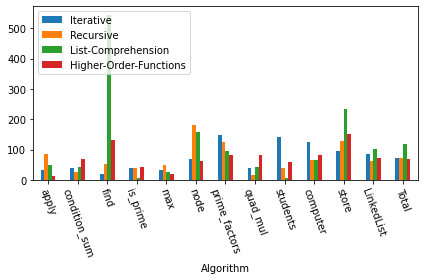

In [10]:
cols = ["Algorithm", "Iterative", "Recursive", "List-Comprehension", "Higher-Order-Functions"]
bar_df = pd.DataFrame([], columns=cols)

for algo_name in algo_name_array:
    df_algo = df[df["Algorithm"] == algo_name]
    iterative = df_algo[df_algo["ProgrammingStyle"] == "iterative"]["ResponseTime"].mean()
    recursive = df_algo[df_algo["ProgrammingStyle"] == "recursive"]["ResponseTime"].mean()
    higher_order = df_algo[df_algo["ProgrammingStyle"] == "higher-order"]["ResponseTime"].mean()
    list_comprehension = df_algo[df_algo["ProgrammingStyle"] == "list-comprehension"]["ResponseTime"].mean()

    bar_df = bar_df.append(pd.DataFrame([[algo_name, iterative, recursive, list_comprehension, higher_order]], columns=cols))

algo_name = "Total"
iterative = df[df["ProgrammingStyle"] == "iterative"]["ResponseTime"].mean()
recursive = df[df["ProgrammingStyle"] == "recursive"]["ResponseTime"].mean()
list_comprehension = df[df["ProgrammingStyle"] == "list-comprehension"]["ResponseTime"].mean()
higher_order = df[df["ProgrammingStyle"] == "higher-order"]["ResponseTime"].mean()
bar_df = bar_df.append(pd.DataFrame([[algo_name, iterative, recursive, list_comprehension, higher_order]], columns=cols))

bar_df = bar_df.set_index("Algorithm")
ax = bar_df.plot.bar(rot=290)
plt.tight_layout()
ax.legend(loc="upper left")
plt.savefig("results/behavioral/bar_response.pdf", bbox_inches="tight", pad_inches=0.01)

In [11]:
writer.close()